In [43]:
from model import Model
from loguru import logger
from typing import List, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting data from data/processed

In [44]:
def getting_data(path: str) -> pd.DataFrame:
    try:
        return pd.read_csv(path, index_col=[0]) 
    except FileNotFoundError as error:
        logger.exception(error)

In [45]:
def euclidian_distance(a: float, b: float, c: float, d: float):
    return np.sqrt((a - c)**2  + (d - b)**2)

In [46]:
def get_informations(df: pd.DataFrame) -> Tuple[int, List[List[int]]]:
    num_cities = len(df)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = euclidian_distance(df.loc[i, "X"], df.loc[i, "Y"], df.loc[j, "X"], df.loc[j, "Y"])

    return num_cities, distance_matrix

In [47]:
df = getting_data("../../data/tsp.csv")

df.head()

,X,Y
City,,
0,37.454012,2.058449
1,95.071431,96.990985
2,73.199394,83.244264
3,59.865848,21.233911
4,15.601864,18.182497


In [48]:
num_cities, matrix = get_informations(df)

In [49]:
def plot_graphic(df: pd.DataFrame, num_cities, matrix) -> None:
    plt.figure(figsize=(10, 8))

    colors = ["orange" if i == 0 else "blue" for i in range(num_cities)]

    plt.scatter(df["X"], df["Y"], color=colors, s=100)

    for i, row in df.iterrows():
        plt.text(row["X"] + 1, row["Y"] + 1, s=str(i + 1),  fontsize=12)

    for i in range(num_cities):
        for j in range(i + 1, num_cities):  # Avoid duplicating edges
            x_values = [df.loc[i, 'X'], df.loc[j, 'X']]
            y_values = [df.loc[i, 'Y'], df.loc[j, 'Y']]
            plt.plot(x_values, y_values, 'gray', linestyle='-', linewidth=1)
            mid_x = (df.loc[i, 'X'] + df.loc[j, 'X']) / 2
            mid_y = (df.loc[i, 'Y'] + df.loc[j, 'Y']) / 2
            plt.text(mid_x, mid_y, f'{matrix[i, j]:.2f}', fontsize=8, color='red')

    plt.show()
    

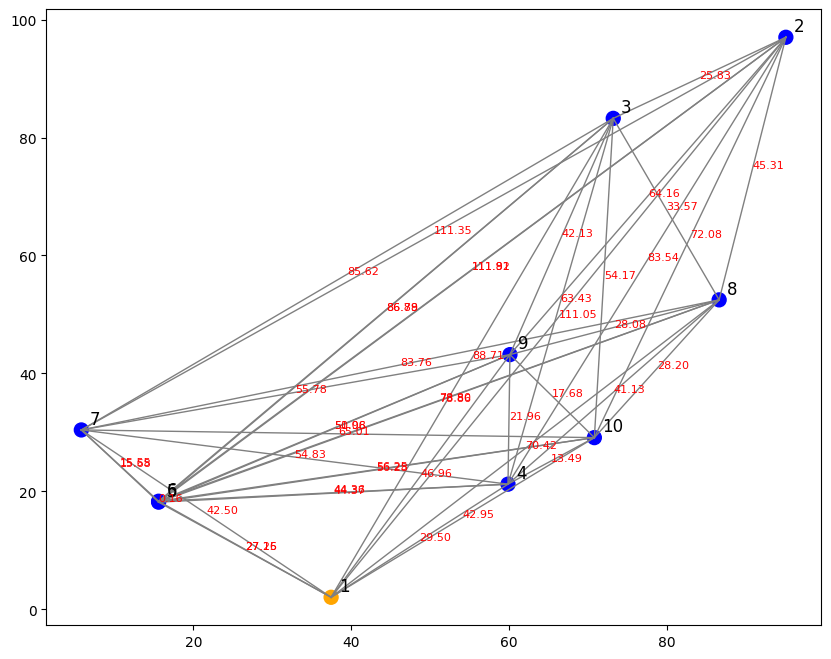

In [50]:
plot_graphic(df=df, num_cities=num_cities, matrix=matrix)

In [51]:
problem = Model(distance=matrix, num_cities=num_cities)

problem.solve()

print(problem.problem_instance)

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de
CPXPARAM_Read_DataCheck                          1


Found incumbent of value 276.074002 after 0.00 sec. (0.01 ticks)
Found incumbent of value 110.062028 after 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 10 rows and 0 columns.
Reduced MIP has 10 rows, 45 columns, and 90 nonzeros.
Reduced MIP has 45 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.06 ticks)
Tried aggregator 1 time.
Reduced MIP has 10 rows, 45 columns, and 90 nonzeros.
Reduced MIP has 45 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.05 ticks)
Probing time = 0.00 sec. (0.06 ticks)
Clique table members: 10.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 sec. (0.03 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0   

2024-08-05 20:04:05.444 | SUCCESS  | model:solve:74 - Objective value: 
2024-08-05 20:04:05.446 | SUCCESS  | model:solve:75 - 110.06202836193454
2024-08-05 20:04:05.446 | INFO     | model:solve:76 - Edges in solution:
2024-08-05 20:04:05.447 | SUCCESS  | model:solve:80 - x_0_6
2024-08-05 20:04:05.448 | SUCCESS  | model:solve:80 - x_1_2
2024-08-05 20:04:05.448 | SUCCESS  | model:solve:80 - x_3_9
2024-08-05 20:04:05.449 | SUCCESS  | model:solve:80 - x_4_5
2024-08-05 20:04:05.450 | SUCCESS  | model:solve:80 - x_7_8


AttributeError: 'Model' object has no attribute 'problem_instance'